In [ ]:
include("jupyter.jl")
Δ = 0.25
t′s = range(t[1], t[2], 50)
μ′ = 2
Random.seed!(1234)

2

In [3]:
seed, l, i = 1, 7, 1
reference = load("reference$(seed).jld2")["reference"]
x̂ = stack(reference.u)
if size(x̂, 1) == N
    x0 = x̂[:, 1]
else
    x0 = reference.x0
end
t̂ = reference.t
t = extrema(t̂)
individuals = load("individuals$(seed).jld2")["individuals"]

individual = individuals[l]
original = sol_individual(individual, x0, η, t)

externals = reduce(vcat, [environmental_copies(individual, t′, Δ, 50) for t′ in t′s])
internals = mutational_copies(individual, μ′, 2500)

filter!(sol -> distance_t(original[1:M, :], sol[1:M, :]) > 0.15, externals)
filter!(sol -> distance_t(original[1:M, :], sol[1:M, :]) > 0.15, internals)

63-element Vector{ODESolution}:
 ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{Float64}}}, Nothing, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Tuple{Vector{Float64}, Matrix{Float64}, Vector{Float64}}, ODEFunction{true, SciMLBase.AutoSpecialize, FunctionWrappersWrappers.FunctionWrappersWrapper{Tuple{FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{Float64}, Vector{Float64}, Tuple{Vector{Float64}, Matrix{Float64}, Vector{Float64}}, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Tuple{Vector{Float64}, Matrix{Float64}, Vector{Float64}}, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{Float64}, Tuple{Vect

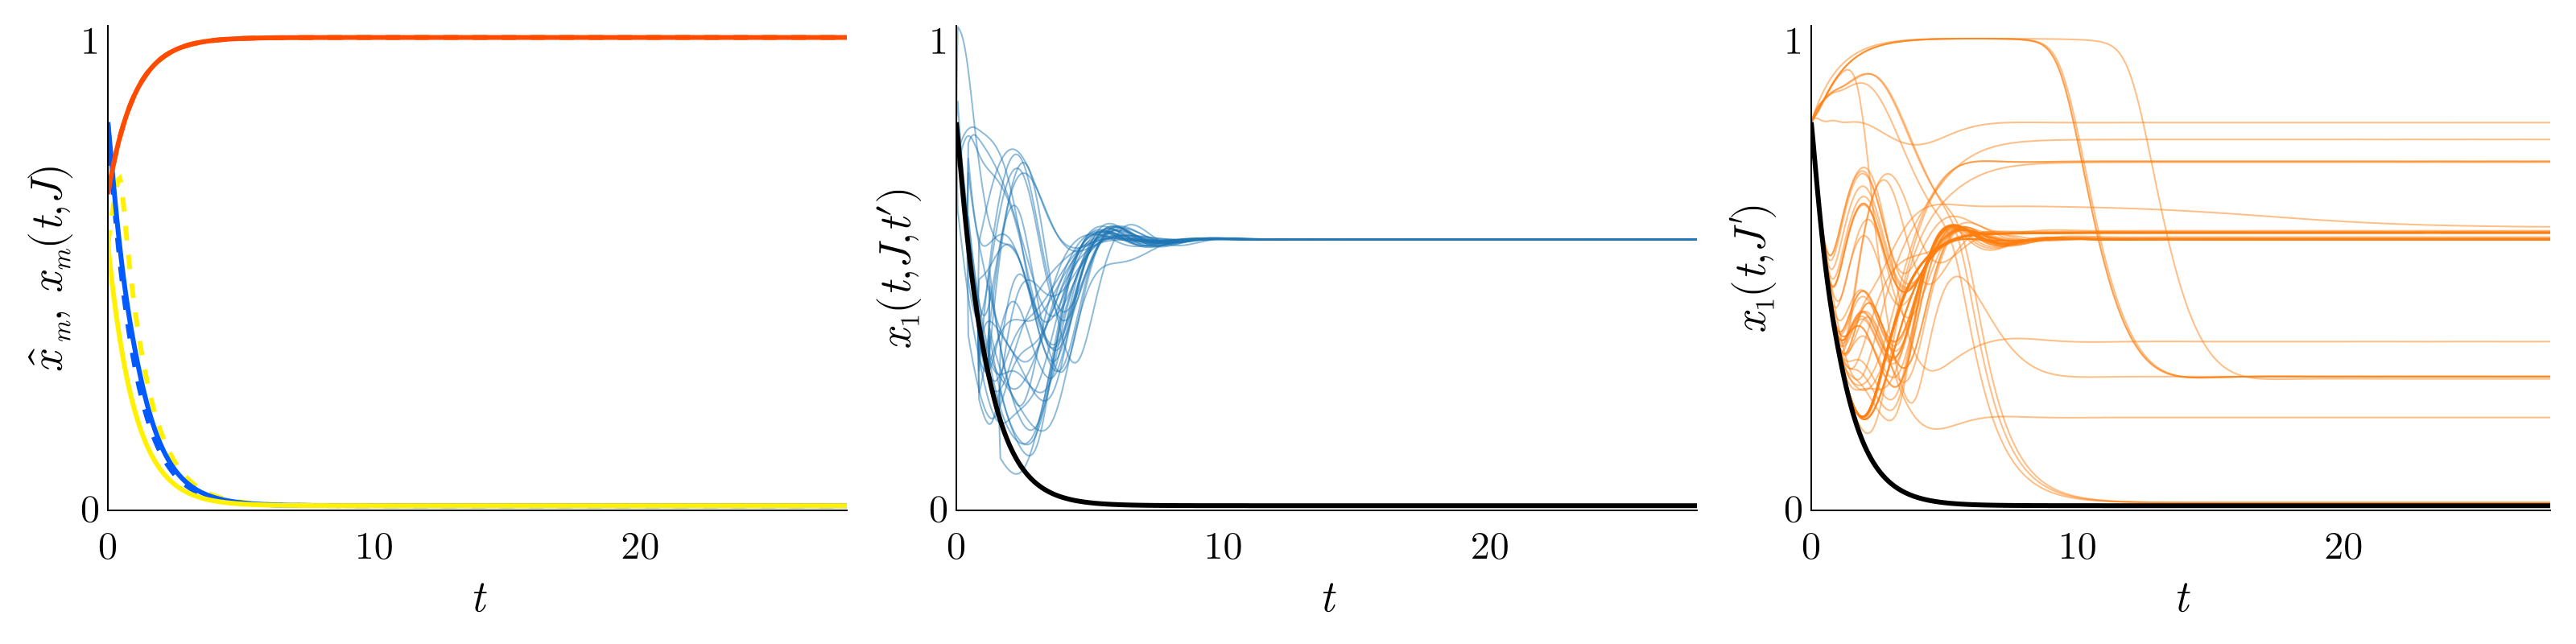

In [4]:
f = Figure(size=(1600, 400))

ax1 = cm.Axis(f[1, 1], xlabel=L"$t$", ylabel=L"$\hat{x}_m,\ x_m(t, J)$", limits=(extrema(t)..., -0.01, 1.025), xticks=[0, 10, 20], yticks=[0, 1])
foreach(i -> lines!(t̂, x̂[i, :], color=ucolors[i], linewidth=3, linestyle=:dash), 1:M)
foreach(i -> lines!(t̂, original[i, :], color=ucolors[i], linewidth=3), 1:M)

ax2 = cm.Axis(f[1, 2], xlabel=L"$t$", ylabel=L"$x_{%$(i)}(t, J, t\prime)$", limits=(extrema(t)..., -0.01, 1.025), xticks=[0, 10, 20], yticks=[0, 1])
for sol in externals
    lines!(sol.t, sol[i, :], color=tab10[1], linewidth=1, alpha=0.5)
end
lines!(original.t, original[i, :], color=:black, linewidth=3)

ax3 = cm.Axis(f[1, 3], xlabel=L"$t$", ylabel=L"$x_{%$(i)}(t, J')$", limits=(extrema(t)..., -0.01, 1.025), xticks=[0, 10, 20], yticks=[0, 1])
for sol in internals
    lines!(sol.t, sol[i, :], color=tab10[2], linewidth=1, alpha=0.5)
end
lines!(original.t, original[i, :], color=:black, linewidth=3)
# save("rt$(seed).pdf", f)
f

In [ ]:
seed, l, i = 4, 8, 2
reference = load("reference$(seed).jld2")["reference"]
x̂ = stack(reference.u)
if size(x̂, 1) == N
    x0 = x̂[:, 1]
else
    x0 = reference.x0
end
t̂ = reference.t
t = extrema(t̂)
individuals = load("individuals$(seed).jld2")["individuals"]

individual = individuals[l]
original = sol_individual(individual, x0, η, t)

externals = reduce(vcat, [environmental_copies(individual, t′, Δ, 50) for t′ in t′s])
internals = mutational_copies(individual, μ′, 2500)

filter!(sol -> distance_t(original[1:M, :], sol[1:M, :]) > 0.15, externals)
filter!(sol -> distance_t(original[1:M, :], sol[1:M, :]) > 0.15, internals)

718-element Vector{ODESolution}:
 ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{Float64}}}, Nothing, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Tuple{Vector{Float64}, Matrix{Float64}, Vector{Float64}}, ODEFunction{true, SciMLBase.AutoSpecialize, FunctionWrappersWrappers.FunctionWrappersWrapper{Tuple{FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{Float64}, Vector{Float64}, Tuple{Vector{Float64}, Matrix{Float64}, Vector{Float64}}, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Tuple{Vector{Float64}, Matrix{Float64}, Vector{Float64}}, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{Float64}, Tuple{Vec

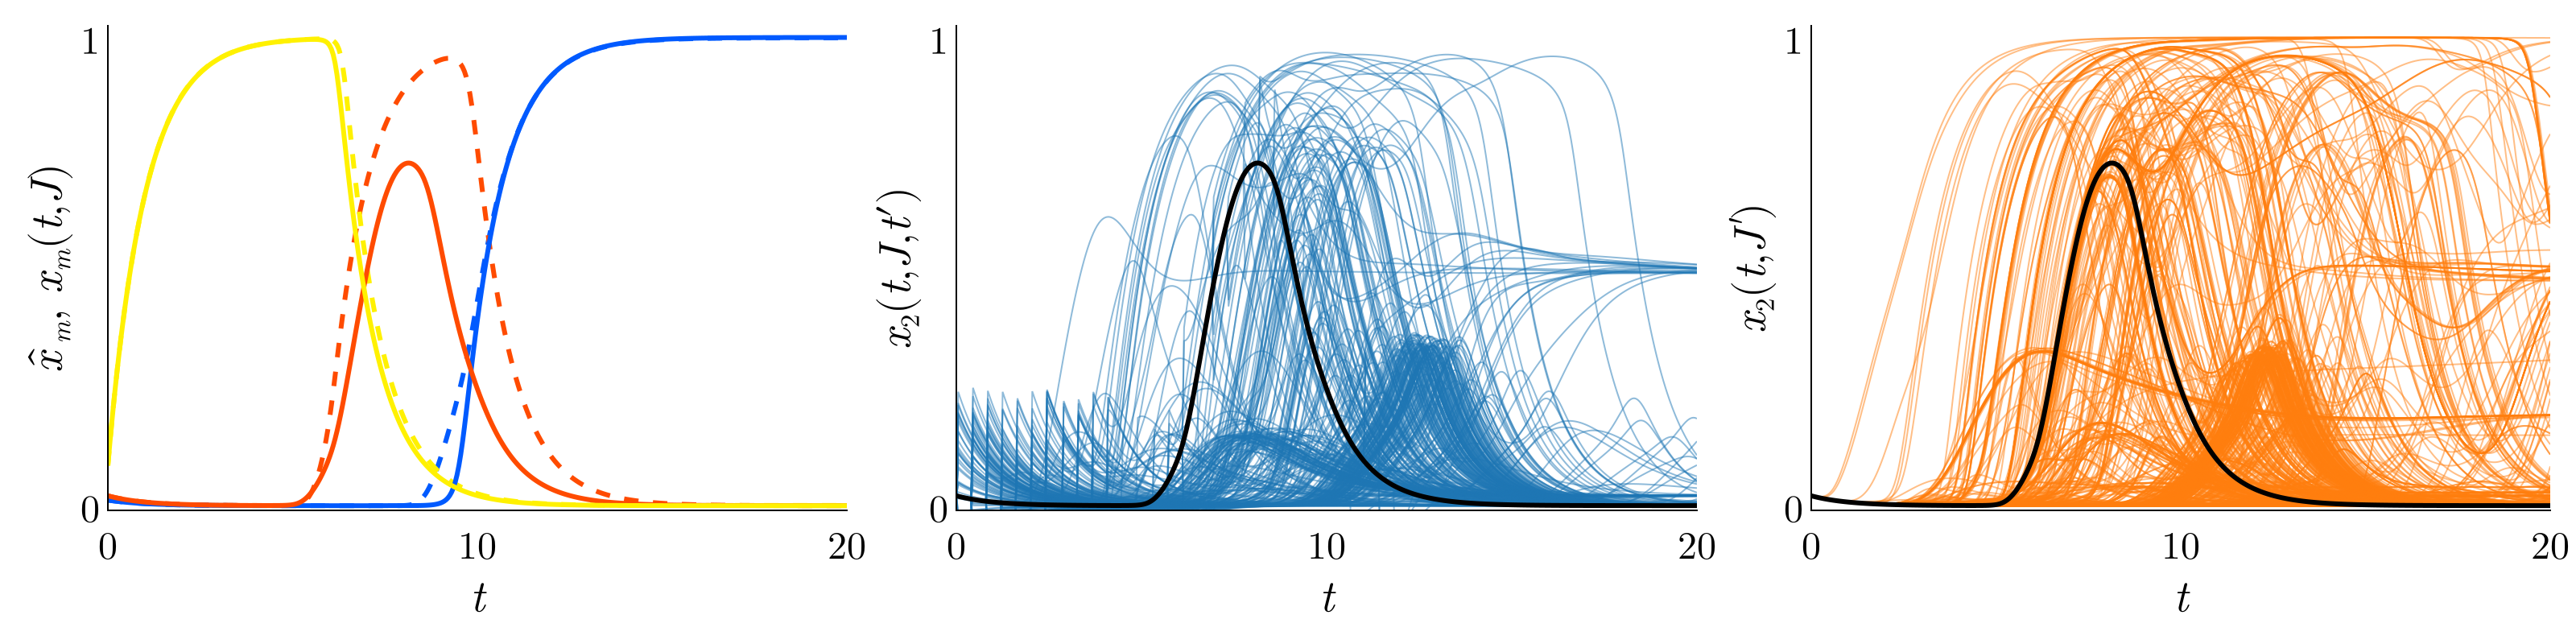

In [6]:
f = Figure(size=(1600, 400))

ax1 = cm.Axis(f[1, 1], xlabel=L"$t$", ylabel=L"$\hat{x}_m,\ x_m(t, J)$", limits=(extrema(t)..., -0.01, 1.025), xticks=[0, 10, 20], yticks=[0, 1])
foreach(i -> lines!(t̂, x̂[i, :], color=ucolors[i], linewidth=3, linestyle=:dash), 1:M)
foreach(i -> lines!(t̂, original[i, :], color=ucolors[i], linewidth=3), 1:M)

ax2 = cm.Axis(f[1, 2], xlabel=L"$t$", ylabel=L"$x_{%$(i)}(t, J, t\prime)$", limits=(extrema(t)..., -0.01, 1.025), xticks=[0, 10, 20], yticks=[0, 1])
for sol in externals
    lines!(sol.t, sol[i, :], color=tab10[1], linewidth=1, alpha=0.5)
end
lines!(original.t, original[i, :], color=:black, linewidth=3)

ax3 = cm.Axis(f[1, 3], xlabel=L"$t$", ylabel=L"$x_{%$(i)}(t, J')$", limits=(extrema(t)..., -0.01, 1.025), xticks=[0, 10, 20], yticks=[0, 1])
for sol in internals
    lines!(sol.t, sol[i, :], color=tab10[2], linewidth=1, alpha=0.5)
end
lines!(original.t, original[i, :], color=:black, linewidth=3)
# save("rt$(seed).pdf", f)
f

In [ ]:
seed, l, i = 5, 12, 2
reference = load("reference$(seed).jld2")["reference"]
x̂ = stack(reference.u)
if size(x̂, 1) == N
    x0 = x̂[:, 1]
else
    x0 = reference.x0
end
t̂ = reference.t
t = extrema(t̂)
individuals = load("individuals$(seed).jld2")["individuals"]

individual = individuals[l]
original = sol_individual(individual, x0, η, t)

externals = reduce(vcat, [environmental_copies(individual, t′, Δ, 50) for t′ in t′s])
internals = mutational_copies(individual, μ′, 2500)

filter!(sol -> distance_t(original[1:M, :], sol[1:M, :]) > 0.15, externals)
filter!(sol -> distance_t(original[1:M, :], sol[1:M, :]) > 0.15, internals)

282-element Vector{ODESolution}:
 ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{Float64}}}, Nothing, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Tuple{Vector{Float64}, Matrix{Float64}, Vector{Float64}}, ODEFunction{true, SciMLBase.AutoSpecialize, FunctionWrappersWrappers.FunctionWrappersWrapper{Tuple{FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{Float64}, Vector{Float64}, Tuple{Vector{Float64}, Matrix{Float64}, Vector{Float64}}, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Tuple{Vector{Float64}, Matrix{Float64}, Vector{Float64}}, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{Float64}, Tuple{Vec

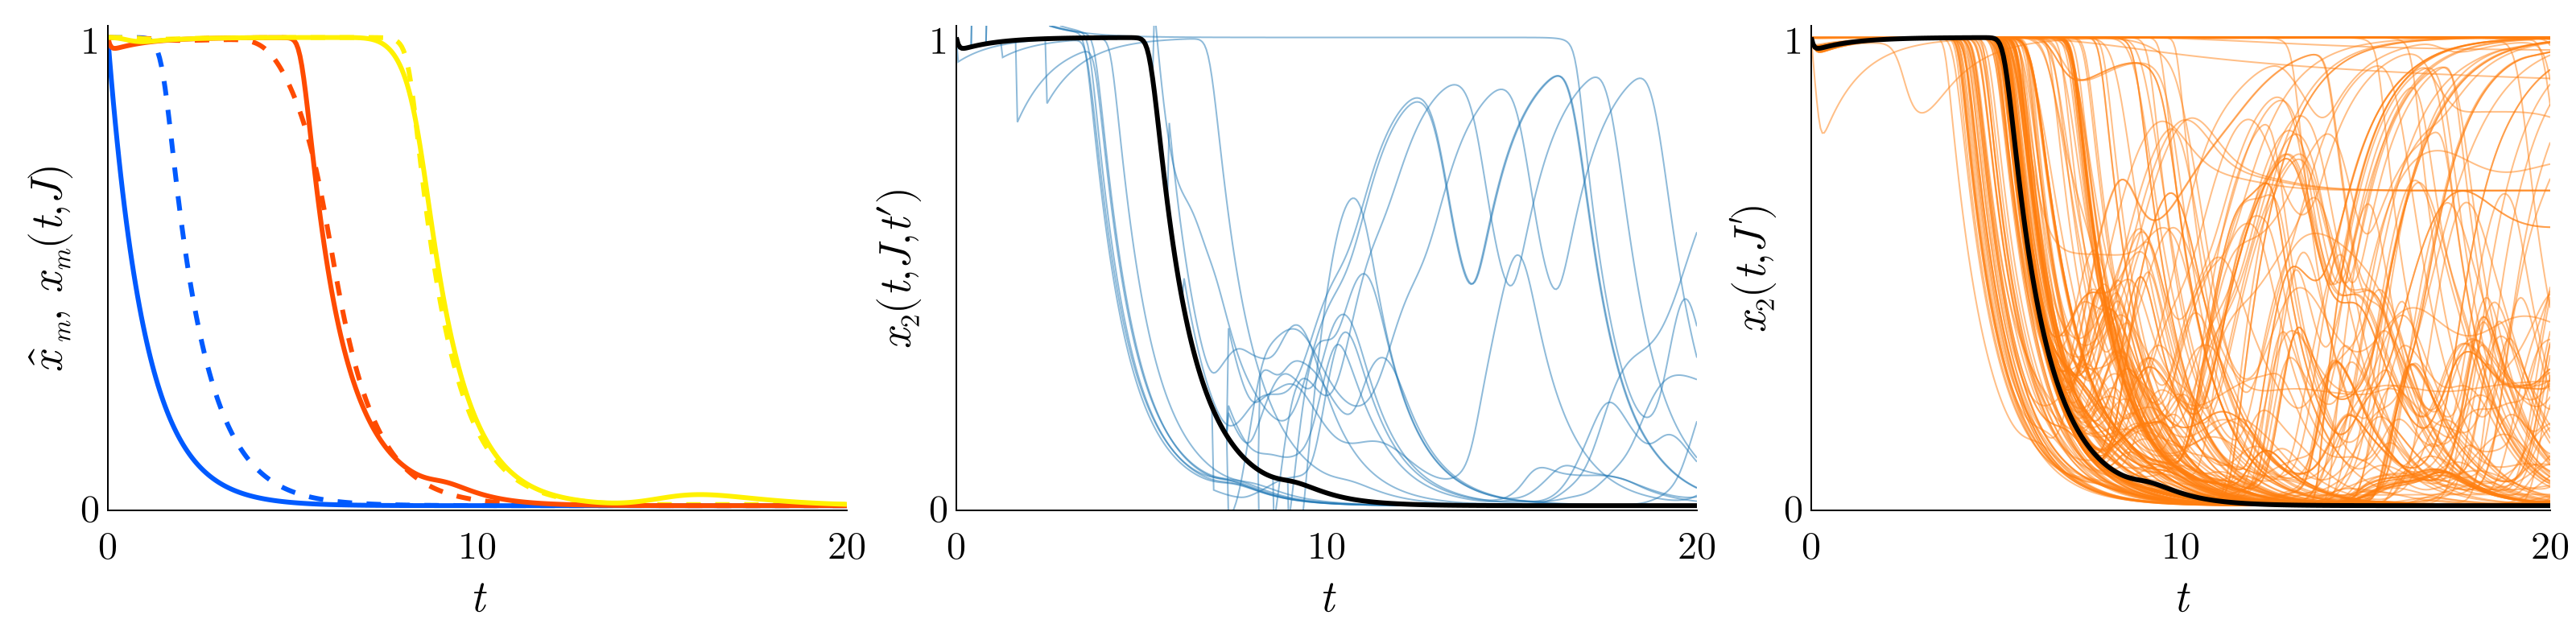

In [8]:
f = Figure(size=(1600, 400))

ax1 = cm.Axis(f[1, 1], xlabel=L"$t$", ylabel=L"$\hat{x}_m,\ x_m(t, J)$", limits=(extrema(t)..., -0.01, 1.025), xticks=[0, 10, 20], yticks=[0, 1])
foreach(i -> lines!(t̂, x̂[i, :], color=ucolors[i], linewidth=3, linestyle=:dash), 1:M)
foreach(i -> lines!(t̂, original[i, :], color=ucolors[i], linewidth=3), 1:M)

ax2 = cm.Axis(f[1, 2], xlabel=L"$t$", ylabel=L"$x_{%$(i)}(t, J, t\prime)$", limits=(extrema(t)..., -0.01, 1.025), xticks=[0, 10, 20], yticks=[0, 1])
for sol in externals
    lines!(sol.t, sol[i, :], color=tab10[1], linewidth=1, alpha=0.5)
end
lines!(original.t, original[i, :], color=:black, linewidth=3)

ax3 = cm.Axis(f[1, 3], xlabel=L"$t$", ylabel=L"$x_{%$(i)}(t, J')$", limits=(extrema(t)..., -0.01, 1.025), xticks=[0, 10, 20], yticks=[0, 1])
for sol in internals
    lines!(sol.t, sol[i, :], color=tab10[2], linewidth=1, alpha=0.5)
end
lines!(original.t, original[i, :], color=:black, linewidth=3)
# save("rt$(seed).pdf", f)
f